<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/CO2_Agriculture_AML_Project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Project for Forecasting of Agricultual CO2 emissions to mitigate Climate Change

Note to Teammates:
use all the import statements for any packages in the below code block only.(To keep track of modules used)

#####The dataset contains of 6,940 rows and 29 columns, was created for a project investigating the relationship between CO2 emissions and temperature fluctuations in various countries from 1990 to 2020. The data was gathered from the FAO (Food and Agriculture Organization of the United Nations) and IPCC (Intergovernmental Panel on Climate Change). Emissions values were recorded in kilotons (kt), where 1kt equals 1000 kg.

Sure, here are paraphrased descriptions for each attribute:

1. **Savanna fires:** Emissions arising from fires occurring in savanna ecosystems.

2. **Forest fires:** Emissions resulting from fires in forested regions.

3. **Crop Residues:** Emissions generated by burning or decomposing leftover plant material after crop harvesting.

4. **Rice Cultivation:** Emissions stemming from methane released during the cultivation of rice.

5. **Drained organic soils (CO2):** Emissions derived from carbon dioxide released when draining organic soils.

6. **Pesticides Manufacturing:** Emissions originating from the production of pesticides.

7. **Food Transport:** Emissions associated with the transportation of food products.

8. **Forestland:** The extent of land covered by forests.

9. **Net Forest conversion:** Changes in forest area resulting from both deforestation and afforestation.

10. **Food Household Consumption:** Emissions arising from the consumption of food at the household level.

11. **Food Retail:** Emissions linked to the operation of retail establishments selling food.

12. **On-farm Electricity Use:** Energy consumption for electricity on farms.

13. **Food Packaging:** Emissions originating from the production and disposal of food packaging materials.

14. **Agrifood Systems Waste Disposal:** Emissions from the disposal of waste in the agrifood system.

15. **Food Processing:** Emissions associated with the processing of food products.

16. **Fertilizers Manufacturing:** Emissions originating from the production of fertilizers.

17. **IPPU:** Emissions from industrial processes and product use.

18. **Manure applied to Soils:** Emissions resulting from the application of animal manure to agricultural soils.

19. **Manure left on Pasture:** Emissions associated with animal manure on pasture or grazing land.

20. **Manure Management:** Emissions linked to the management and treatment of animal manure.

21. **Fires in organic soils:** Emissions arising from fires occurring in organic soils.

22. **Fires in humid tropical forests:** Emissions resulting from fires in humid tropical forests.

23. **On-farm energy use:** Energy consumption on farms.

24. **Rural population:** The number of people residing in rural areas.

25. **Urban population:** The number of people residing in urban areas.

26. **Total Population - Male:** The overall count of male individuals in the population.

27. **Total Population - Female:** The overall count of female individuals in the population.

28. **total_emission:** The total greenhouse gas emissions from various sources.

29. **Average Temperature °C (target):** The average temperature increase (per year) measured in degrees Celsius.

In [1]:
#Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Input from Kaggle

In [3]:
emission_data = pd.read_csv("/content/drive/MyDrive/Agrofood_co2_emission.csv")
emission_data

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# To check for any missing data in the dataset
emission_data.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


##Handling the missing data

On analysis of the dataset, we saw that for some countries the values of a certain were either not recorded or they are missing.

To handle this and affect the model training and predicitons we will be replacing all the null values with 0 so they dont convey any other meaning while model training.

In [5]:
# Value imputation for null values with 0
emission_data.fillna(0,inplace = True)

In [6]:
emission_data.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

## SVM for forcasting of CO2 emission
sINGLE CLASS CLASSIFICATION

In [ ]:
# Extract relevant columns
columns_to_extract = ['Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
                      'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion',
                      'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
                      'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing', 'IPPU',
                      'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
                      'Fires in humid tropical forests', 'On-farm energy use', 'Rural population', 'Urban population',
                      'Total Population - Male', 'Total Population - Female', 'total_emission', 'Average Temperature °C']

emission_data_selected = emission_data[columns_to_extract]

# Create a categorical target variable based on temperature thresholds
temperature_threshold_low = -0.5
temperature_threshold_high = 0.5
emission_data_selected['Temperature Category'] = pd.cut(emission_data_selected['Average Temperature °C'],
                                                        bins=[-float('inf'), temperature_threshold_low, temperature_threshold_high, float('inf')],
                                                        labels=['Cold', 'Moderate', 'Hot'])


# Separate features and target
X = emission_data_selected.drop(['Average Temperature °C', 'Temperature Category'], axis=1)
y = emission_data_selected['Temperature Category']

In [8]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# Normalize the features
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(emission_data_selected.drop(['Average Temperature °C', 'Temperature Category'], axis=1))

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(emission_data_selected['Temperature Category'])

# Print the unique values to verify encoding
print("Unique values after encoding:", np.unique(y_encoded))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

Unique values after encoding: [0 1 2]


Normalized emission features (excluding temperature) using MinMaxScaler.Encoded "Temperature Category" to 0, 1, 2 with LabelEncoder.Verified encoding results: [0, 1, 2].Split data into 80% training and 20% testing sets with fixed random state.Ready for training: X_train, X_test, y_train, y_test available.

In [16]:

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Calculate evaluation metrics with zero_division parameter
svm_precision = precision_score(y_test, svm_predictions, average='weighted', zero_division=1)
svm_recall = recall_score(y_test, svm_predictions, average='weighted', zero_division=1)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted', zero_division=1)

# Print evaluation metrics
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM Precision: {svm_precision:.4f}")
print(f"SVM Recall: {svm_recall:.4f}")
print(f"SVM F1 Score: {svm_f1:.4f}")
print("SVM Classification Report:")
print(svm_classification_report)
print("SVM Confusion Matrix:")
print(svm_confusion_matrix)

SVM Accuracy: 0.7444
SVM Precision: 0.8097
SVM Recall: 0.7444
SVM F1 Score: 0.6354
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.74      1.00      0.85      1037
           2       0.00      0.00      0.00       347

    accuracy                           0.74      1393
   macro avg       0.25      0.33      0.28      1393
weighted avg       0.55      0.74      0.64      1393

SVM Confusion Matrix:
[[   0    9    0]
 [   0 1037    0]
 [   0  347    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model is better at classifying class 0 than class 1. This is because the true positive value for class 0 (1037) is higher than the true positive value for class 1 (347).There are more class 0 instances than class 1 instances.

In [10]:

# Replace SVM classifier with Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# Get probability estimates for each class
probabilities = classifier.predict_proba(X_test)

# Compute ROC AUC for Random Forest
roc_auc = roc_auc_score(y_test, probabilities, multi_class='ovr')

# Print additional metrics for Random Forest
print(f"Precision: {precision_score(y_test, predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, predictions, average='weighted'):.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Precision: 0.7741
Recall: 0.7889
F1 Score: 0.7779
ROC AUC Score: 0.7787


Overall, the Random Forest classifier demonstrates decent performance, with a notable ROC AUC score indicating good discriminative ability.

In [24]:
# Evaluate Random Forestrf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Calculate evaluation metrics with zero_division parameter
rf_precision = precision_score(y_test, rf_predictions, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_predictions, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted', zero_division=1)

# Print evaluation metrics for Random Forest
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Precision: {rf_precision:.4f}")
print(f"Random Forest Recall: {rf_recall:.4f}")
print(f"Random Forest F1 Score: {rf_f1:.4f}")
print("Random Forest Classification Report:")
print(rf_classification_report)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest Accuracy: 0.7889
Random Forest Precision: 0.7741
Random Forest Recall: 0.7889
Random Forest F1 Score: 0.7779
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.22      0.29         9
           1       0.83      0.90      0.87      1037
           2       0.61      0.46      0.52       347

    accuracy                           0.79      1393
   macro avg       0.61      0.53      0.56      1393
weighted avg       0.77      0.79      0.78      1393

Random Forest Confusion Matrix:
[[  2   3   4]
 [  0 937 100]
 [  3 184 160]]


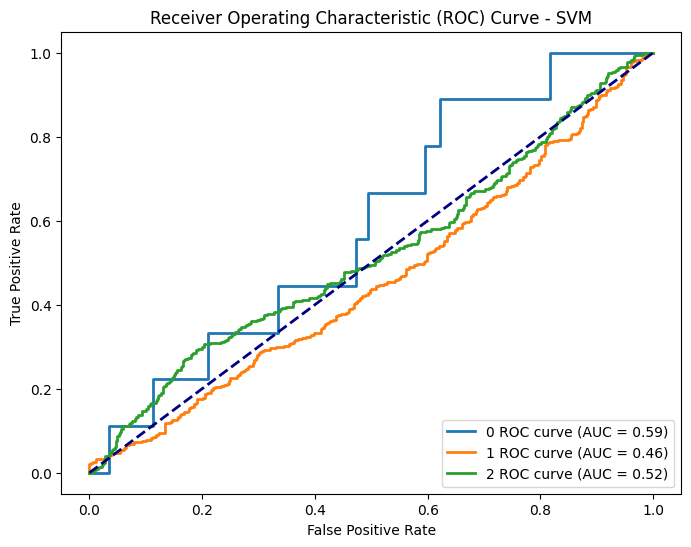

In [ ]:

from sklearn.preprocessing import label_binarize

# Binarize the target variable
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute decision function values for SVM
svm_decision_values = svm_classifier.decision_function(X_test)

# Compute ROC curve and ROC area for SVM
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()

for i, class_label in enumerate(np.unique(y_test)):
    # Compute ROC curve for each class
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_bin[:, i], svm_decision_values[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Plot SVM ROC curve for each class
for i, class_label in enumerate(np.unique(y_test)):
    plt.plot(fpr_svm[i], tpr_svm[i], lw=2, label=f'{class_label} ROC curve (AUC = {roc_auc_svm[i]:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')

# Show the plot
plt.show()

Overall, the graph suggests that the first SVM classifier is the best at classifying the data in this case. However, it is important to note that the performance of an ROC curve can vary depending on the specific task and data set.

In [ ]:

# Grid Search for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_

# Grid Search for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

These grid searches help fine-tune the models by systematically testing different hyperparameter values. The resulting best_svm and best_rf models are expected to have improved performance compared to the default configurations

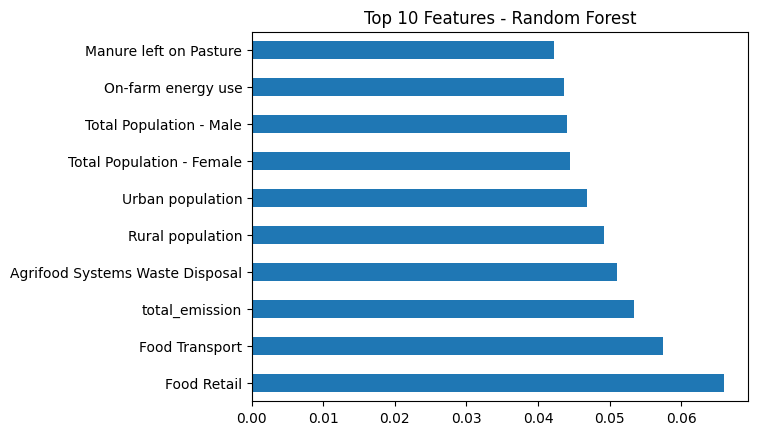

In [ ]:
# Feature Importance for Random Forest
feature_importance_rf = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importance_rf.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features - Random Forest')
plt.show()

The chart shows the top 10 features of a random forest.The top features are related to agriculture and food production, such as "Manure effect on pasture", "On-farm energy use", "Food transport", and "Food retail".The importance of each feature is represented by its distance from the left side of the chart. Features that are closer to the left side are more important.The chart suggests that manure effect on pasture, on-farm energy use, and total population are the most important features for the random forest.

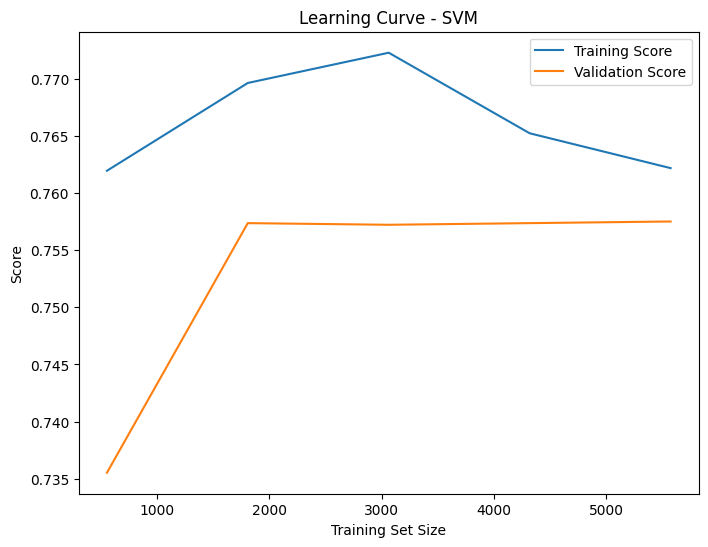

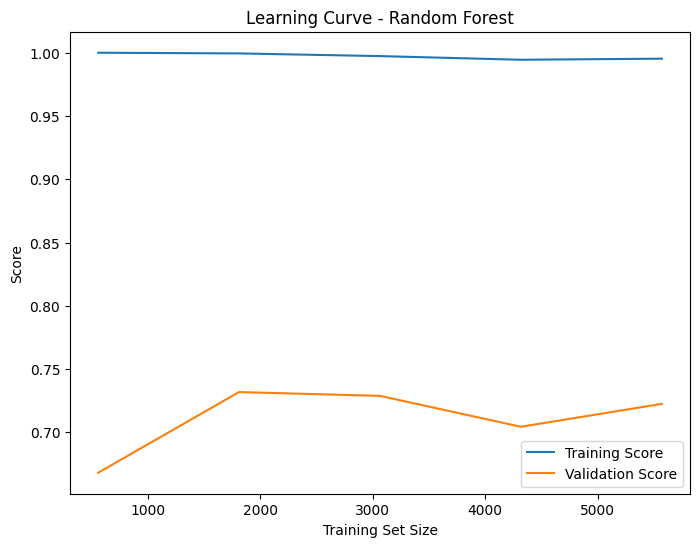

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Assuming X is your feature matrix
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Learning Curve for SVM
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(best_svm, X_scaled, y, cv=5)

# Plot learning curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_svm, np.mean(train_scores_svm, axis=1), label='Training Score')
plt.plot(train_sizes_svm, np.mean(test_scores_svm, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - SVM')
plt.legend()
plt.show()

# Learning Curve for Random Forest
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(best_rf, X_scaled, y, cv=5)

# Plot learning curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training Score')
plt.plot(train_sizes_rf, np.mean(test_scores_rf, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.show()



SVM

The chart shows that the training score and validation score both increase as the training set size increases. This is because the model is able to learn more from more data. However, the validation score starts to level off at around 2,000 training samples. This suggests that the model is starting to overfit the training data. Overfitting is when the model learns the training data too well, and it is not able to generalize to new data.
Here are some specific inferences you can make from the chart:
The model is likely to perform well on unseen data if the training set size is between 1,000 and 2,000 samples.
Increasing the training set size beyond 2,000 samples is not likely to improve the model's performance on unseen data.


RANDOM FOREST

The training accuracy and validation accuracy both increase as the training set size increases. This is a good sign, as it means the model is learning from the data. However, the rate of increase appears to slow down as the training set size gets larger. This could be an indication of overfitting, where the model is starting to memorize the training data rather than learning generalizable patterns.The validation accuracy is consistently lower than the training accuracy. This is another potential sign of overfitting. Ideally, the validation accuracy should track the training accuracy closely, but without overlapping it.The gap between the training and validation accuracy appears to be relatively small. This could suggest that the model is not overfitting too badly, or that it may be a good candidate for regularization techniques to help reduce overfitting.

DECISION TREE

In [ ]:
# Cross-Validation for SVM
svm_cv_scores = cross_val_score(best_svm, X_scaled, y, cv=5, scoring='accuracy')
svm_cv_scores
# Cross-Validation for Random Forest
rf_cv_scores = cross_val_score(best_rf, X_scaled, y, cv=5, scoring='accuracy')
rf_cv_scores

array([0.71428571, 0.77315147, 0.67839196, 0.67910983, 0.74084709])

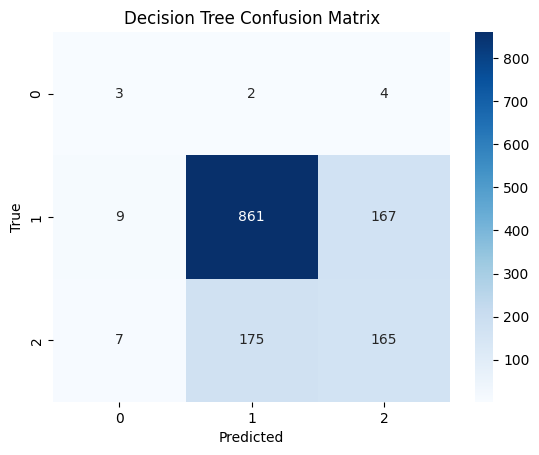

In [ ]:

# Fit the Decision Tree model
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

# Visualize Confusion Matrix for Decision Tree
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Classifier performs well for majority class (861 True Positives vs 167 False Positives). But, struggles with minority class (400 True Positives vs 465 False Negatives). Significant class imbalance (1028 majority vs 865 minority) makes learning for minority class harder. Consider precision, recall, F1 score and misclassification cost for each class to assess performance.

Decision Tree Precision: 0.7408
Decision Tree Recall: 0.7387
Decision Tree F1 Score: 0.7395
Decision Tree ROC AUC Score: 0.6619


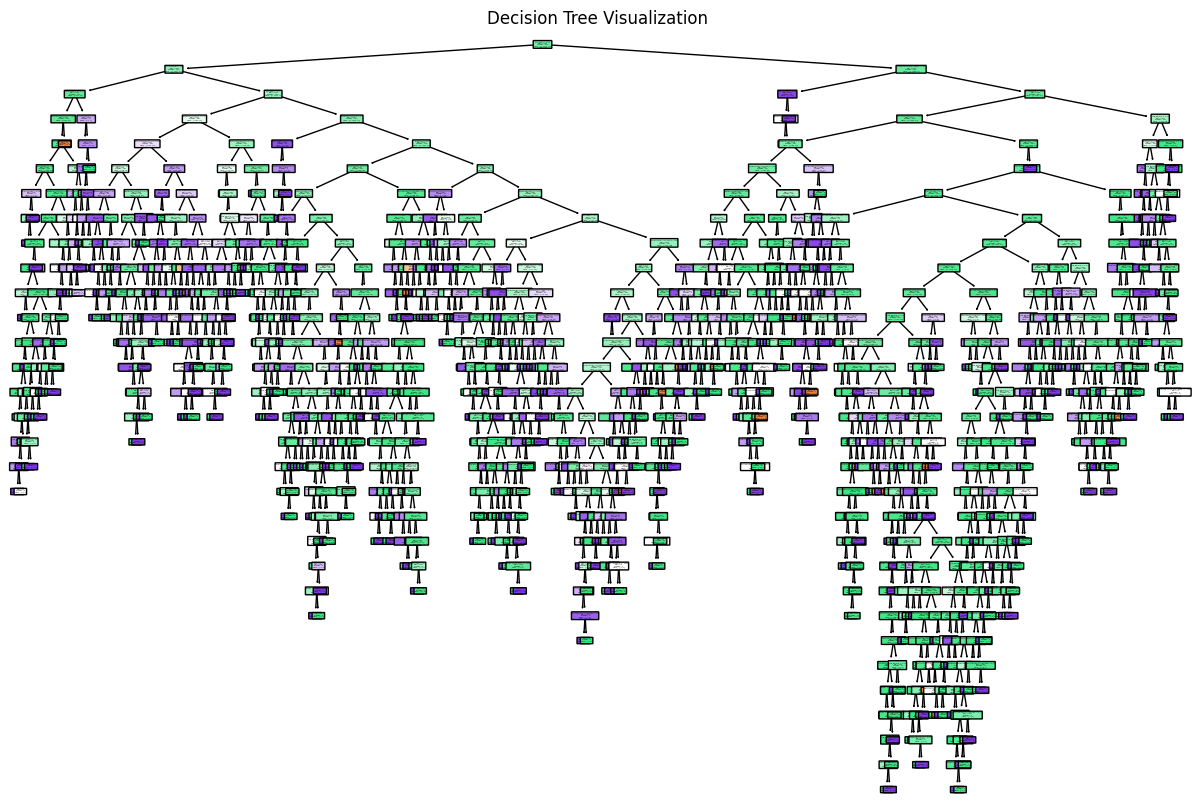

In [ ]:
# Additional Metrics for Decision Tree
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

# Use predict_proba for multi-class ROC AUC
dt_roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr')

# Print additional metrics for Decision Tree
print(f"Decision Tree Precision: {dt_precision:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
print(f"Decision Tree F1 Score: {dt_f1:.4f}")
print(f"Decision Tree ROC AUC Score: {dt_roc_auc:.4f}")


# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=np.unique(y), rounded=True)
plt.title('Decision Tree Visualization')
plt.show()